In [9]:
!pip install skillsnetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.1 MB/s eta 0:00:00


In [7]:
!pip install tqdm

In [2]:
!pip3 install  --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [10]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2DTranspose,BatchNormalization,ReLU,Conv2D,LeakyReLU
import time

import keras

from IPython import display
import skillsnetwork
print(f"skillsnetwork version: {skillsnetwork.__version__}")

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os import listdir
from pathlib import Path
import imghdr

from tqdm import tqdm

tensorflow version: 2.15.0
skillsnetwork version: 0.20.6


In [11]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_distribution(real_data,generated_data,discriminator=None,density=True):

    plt.hist(real_data.numpy(), 100, density=density, facecolor='g', alpha=0.75, label='real data')
    plt.hist(generated_data.numpy(), 100, density=density, facecolor='r', alpha=0.75,label='generated data q(z) ')

    if discriminator:
        max_=np.max([int(real_data.numpy().max()),int(generated_data.numpy().max())])
        min_=np.min([int(real_data.numpy().min()),int(generated_data.numpy().min())])
        x=np.linspace(min_, max_, 1000).reshape(-1,1)
        plt.plot(x,tf.math.sigmoid(discriminator(x,training=False).numpy()),label='discriminator',color='k')
        plt.plot(x,0.5*np.ones(x.shape),label='0.5',color='b')
        plt.xlabel('x')

    plt.legend()
    plt.show()

def plot_array(X,title=""):

    plt.rcParams['figure.figsize'] = (20,20)

    for i,x in enumerate(X[0:5]):
        x=x.numpy()
        max_=x.max()
        min_=x.min()
        xnew=np.uint(255*(x-min_)/(max_-min_))
        plt.subplot(1,5,i+1)
        plt.imshow(xnew)
        plt.axis("off")

    plt.show()

In [12]:
mean = [10]
cov = [[1]]
X = tf.random.normal((5000,1),mean=10,stddev=1.0)

print("mean:",np.mean(X))
print("standard deviation:",np.std(X))

mean: 10.015636
standard deviation: 1.0208509


In [13]:
Z = tf.random.normal((5000,1),mean=0,stddev=2)

In [14]:
print("mean:",np.mean(Z))
print("standard deviation:",np.std(Z))

mean: 0.011390195
standard deviation: 2.022054


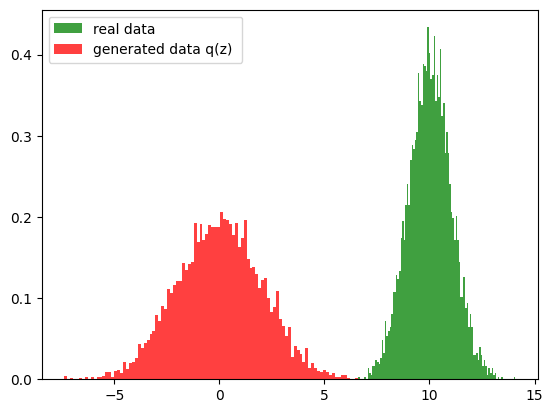

In [15]:
plot_distribution(X,Z,discriminator=None,density=True)

In [16]:
Xhat=Z+10

In [17]:
print("mean:",np.mean(Xhat))
print("standard deviation:",np.std(Xhat))

mean: 10.011391
standard deviation: 2.022054


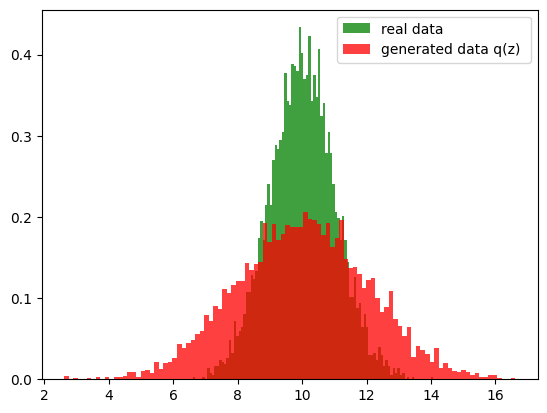

In [18]:
plot_distribution(X,Xhat,discriminator=None,density=True)

In [19]:
def make_generator_model():
    generator = tf.keras.Sequential()
    generator.add(layers.Dense(1))
    return generator

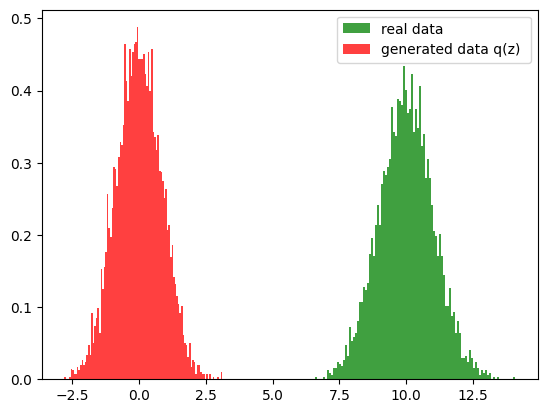

In [20]:
generator=make_generator_model()

Xhat = generator(Z, training=False)
plot_distribution(real_data=X,generated_data=Xhat)

In [21]:
def make_discriminator_model():
    discriminator=tf.keras.Sequential()
    discriminator.add(layers.Dense(1))
    return discriminator

discriminator=make_discriminator_model()

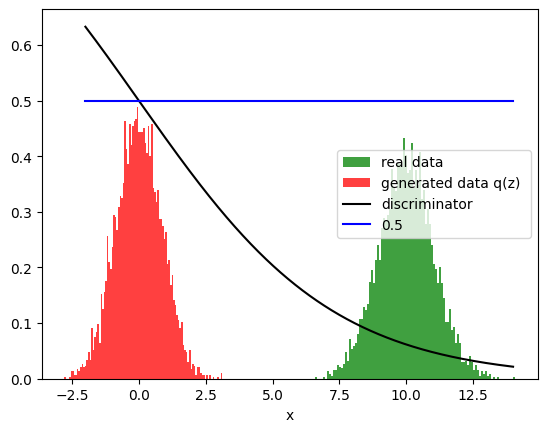

In [22]:
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator)

In [23]:
py_x=tf.math.sigmoid(discriminator(X,training=False))
np.sum(py_x>0.5)

0

In [24]:
py_x=discriminator(Xhat)
np.sum(py_x>0.5)

75

In [25]:
def get_accuracy(X,Xhat):
    total=0
    py_x=tf.math.sigmoid(discriminator(X,training=False))
    total=np.mean(py_x)
    py_x=tf.math.sigmoid(discriminator(Xhat,training=False))
    total+=np.mean(py_x)
    return total/2

In [26]:
get_accuracy(X,Xhat)

0.28182825446128845

In [27]:
# This method returns a helper function to compute crossentropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [28]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

In [29]:
generator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5,beta_2=0.8)

discriminator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5, beta_2=0.8)

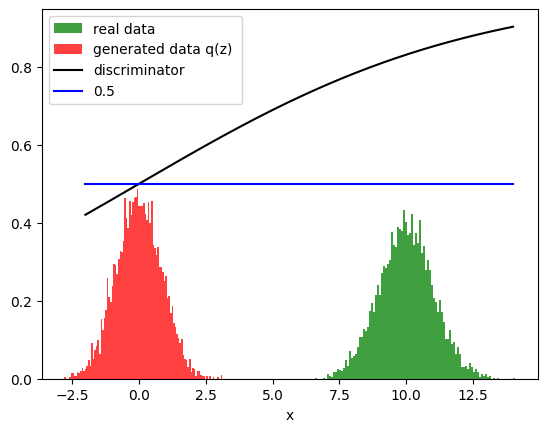

epoch 0


  0%|          | 0/20 [00:00<?, ?it/s]WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


0.22893358767032623


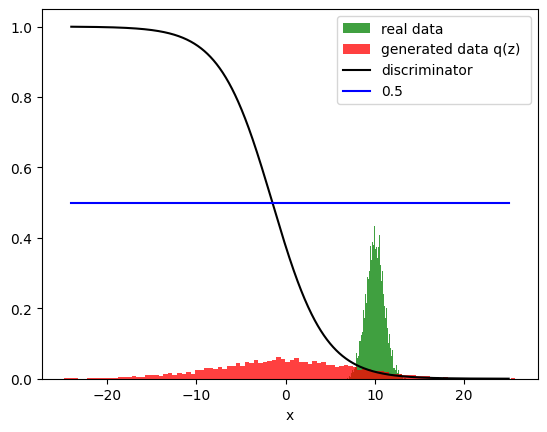

  5%|▌         | 1/20 [00:02<00:56,  2.99s/it]WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


epoch 0


0.5786596536636353


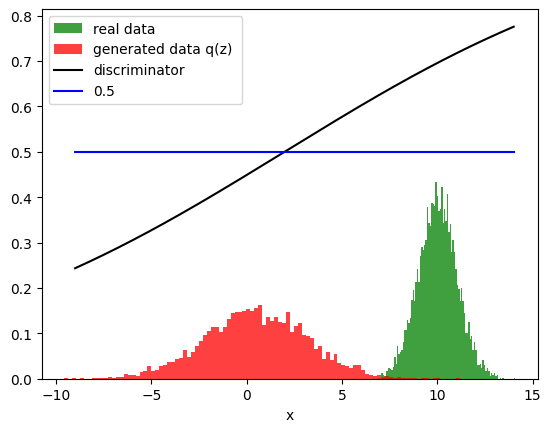

 25%|██▌       | 5/20 [00:04<00:08,  1.80it/s]

epoch 1


0.5425353646278381


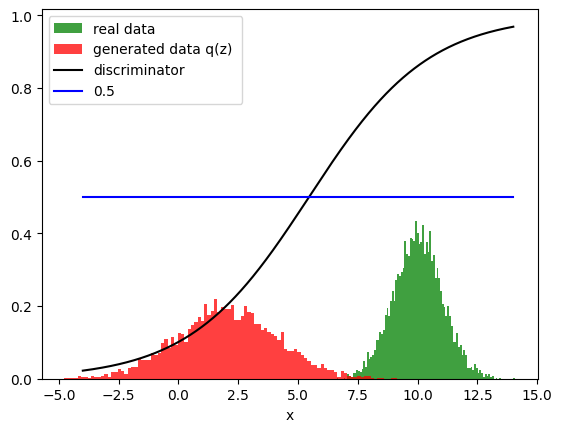

 40%|████      | 8/20 [00:05<00:05,  2.15it/s]WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


epoch 7


0.5059647560119629


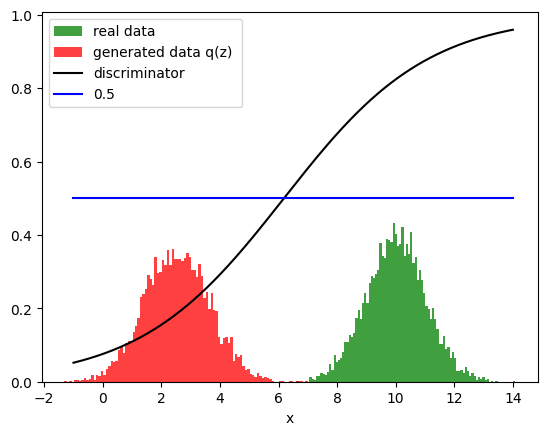

 60%|██████    | 12/20 [00:06<00:02,  2.98it/s]

epoch 8


100%|██████████| 20/20 [00:06<00:00,  2.94it/s]


In [30]:
#parameters for training
epochs=20
BATCH_SIZE=5000
noise_dim=1
epsilon=100


#discrimator and gernerator
tf.random.set_seed(0)
discriminator=make_discriminator_model()
generator=make_generator_model()

tf.config.run_functions_eagerly(True)



gen_loss_epoch=[]
disc_loss_epoch=[]
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator )
print("epoch",0)

for epoch in tqdm(range(epochs)):
    #data for the true distribution of your real data samples training ste
    x = tf.random.normal((BATCH_SIZE,1),mean=10,stddev=1.0)
    #random samples it was found if you increase the standard deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, noise_dim],mean=0,stddev=10)
    # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(x, training=True)
        #the output of the discriminator  data
        fake_output = discriminator(xhat, training=True)
        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    # Compute the gradients for gen_loss and generator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  # Save and display the generator and discriminator if the performance increases
    if abs(0.5-get_accuracy(x,xhat))<epsilon:
        epsilon=abs(0.5-get_accuracy(x,xhat))
        generator.save('generator')
        discriminator.save('discriminator')
        print(get_accuracy(x,xhat))
        plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )
        print("epoch",epoch)

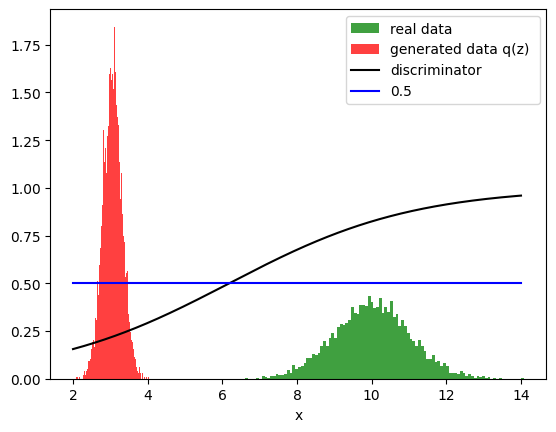

In [31]:
generator=make_generator_model()
generator= models.load_model('generator')
xhat=generator(z)
discriminator=models.load_model('discriminator')
plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )

In [32]:
dataset_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module6/cartoon_20000.zip"
await skillsnetwork.prepare(dataset_url, overwrite=True)

  0%|          | 0/20001 [00:00<?, ?it/s]

Saved to '.'


In [33]:
img_height, img_width, batch_size=64,64,128

In [34]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='cartoon_20000',
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       label_mode=None)

Found 20000 files belonging to 1 classes.


In [35]:
#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [36]:
normalization_layer = layers.experimental.preprocessing.Rescaling(scale= 1./127.5, offset=-1)
normalized_ds = train_ds.map(lambda x: normalization_layer(x))

In [37]:
images=train_ds.take(1)

In [38]:
X=[x for x in images]

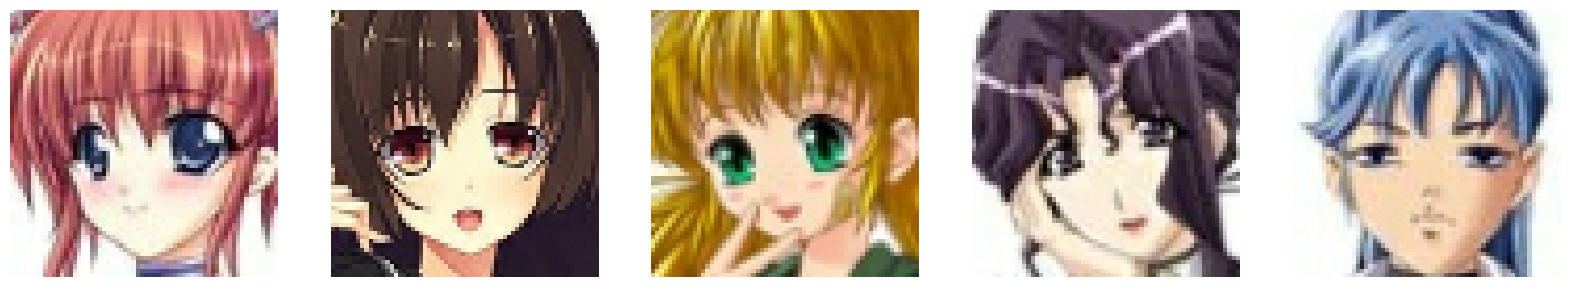

In [39]:
plot_array(X[0])

In [40]:
def make_generator():

    model=Sequential()

    # input is latent vector of 100 dimensions
    model.add(Input(shape=(1, 1, 100), name='input_layer'))

    # Block 1 dimensionality of the output space  64 * 8
    model.add(Conv2DTranspose(64 * 8, kernel_size=4, strides= 4, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_1'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(ReLU(name='relu_1'))

    # Block 2: input is 4 x 4 x (64 * 8)
    model.add(Conv2DTranspose(64 * 4, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(ReLU(name='relu_2'))

    # Block 3: input is 8 x 8 x (64 * 4)
    model.add(Conv2DTranspose(64 * 2, kernel_size=4,strides=  2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_3'))
    model.add(ReLU(name='relu_3'))


    # Block 4: input is 16 x 16 x (64 * 2)
    model.add(Conv2DTranspose(64 * 1, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_4'))
    model.add(ReLU(name='relu_4'))

    model.add(Conv2DTranspose(3, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                              activation='tanh', name='conv_transpose_5'))

    return model

In [41]:
gen = make_generator()
gen.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_transpose_1 (Conv2DTr  (None, 4, 4, 512)         819200    
 anspose)                                                        
                                                                 
 bn_1 (BatchNormalization)   (None, 4, 4, 512)         2048      
                                                                 
 relu_1 (ReLU)               (None, 4, 4, 512)         0         
                                                                 
 conv_transpose_2 (Conv2DTr  (None, 8, 8, 256)         2097152   
 anspose)                                                        
                                                                 
 bn_2 (BatchNormalization)   (None, 8, 8, 256)         1024      
                                                                 
 relu_2 (ReLU)               (None, 8, 8, 256)        

In [42]:
def make_discriminator():

    model=Sequential()

    # Block 1: input is 64 x 64 x (3)
    model.add(Input(shape=(64, 64, 3), name='input_layer'))
    model.add(Conv2D(64, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_1'))

    # Block 2: input is 32 x 32 x (64)
    model.add(Conv2D(64 * 2, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_2'))

    # Block 3
    model.add(Conv2D(64 * 4, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(LeakyReLU(0.2, name='leaky_relu_3'))


    #Block 4
    model.add(Conv2D(64 * 8, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_3'))
    model.add(LeakyReLU(0.2, name='leaky_relu_4'))


    #Block 5
    model.add(Conv2D(1, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                     activation='sigmoid', name='conv_5'))

    return model

In [43]:
disc = make_discriminator()
disc.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        3072      
                                                                 
 leaky_relu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 128)       131072    
                                                                 
 bn_1 (BatchNormalization)   (None, 16, 16, 128)       512       
                                                                 
 leaky_relu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 256)         524288    
                                                                 
 bn_2 (BatchNormalization)   (None, 8, 8, 256)        

In [44]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [45]:
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [46]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

In [47]:
learning_rate = 0.0002

generator_optimizer = tf.keras.optimizers.Adam(lr = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

discriminator_optimizer = tf.keras.optimizers.Adam(lr = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

In [48]:
@tf.function

def train_step(X):

    #random samples it was found if you increase the  stander deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
      # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(X, training=True)
        #the output of the discriminator for fake data
        fake_output = discriminator(xhat, training=True)

        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
      # Compute the gradients for gen_loss and generator

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

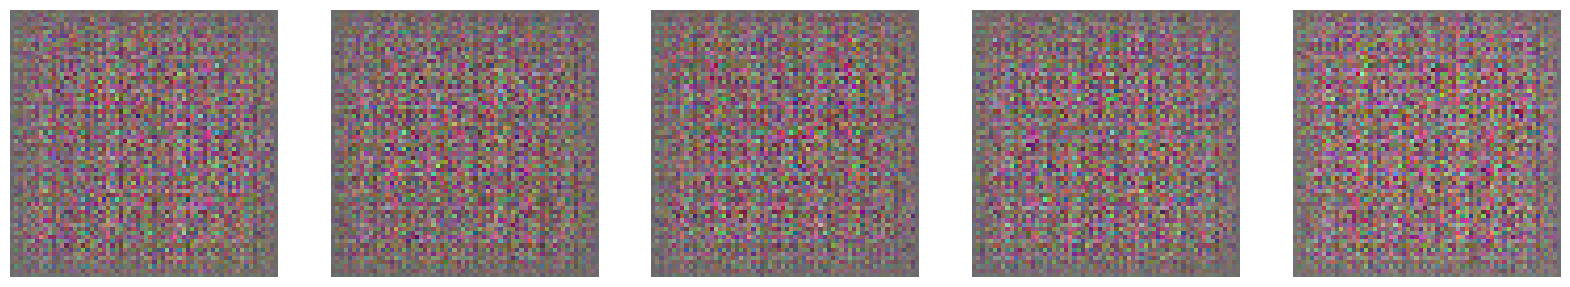

In [49]:
generator= make_generator()
BATCH_SIZE=128

latent_dim=100
noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
Xhat=generator(noise,training=False)
plot_array(Xhat)

epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 1, iteration 1


epoch 1:   1%|          | 1/157 [00:13<34:37, 13.32s/it]

epoch 1, iteration 2


epoch 1:   1%|▏         | 2/157 [00:30<40:56, 15.85s/it]

epoch 1, iteration 3


epoch 1:   2%|▏         | 3/157 [00:41<34:56, 13.62s/it]

epoch 1, iteration 4


epoch 1:   3%|▎         | 4/157 [00:52<31:55, 12.52s/it]

epoch 1, iteration 5


epoch 1:   3%|▎         | 5/157 [01:02<29:36, 11.69s/it]

epoch 1, iteration 6


epoch 1:   4%|▍         | 6/157 [01:13<28:40, 11.40s/it]

epoch 1, iteration 7


epoch 1:   4%|▍         | 7/157 [01:24<27:52, 11.15s/it]

epoch 1, iteration 8


epoch 1:   5%|▌         | 8/157 [01:35<27:50, 11.21s/it]

epoch 1, iteration 9


epoch 1:   6%|▌         | 9/157 [01:46<27:40, 11.22s/it]

epoch 1, iteration 10


epoch 1:   6%|▋         | 10/157 [01:57<27:09, 11.09s/it]

epoch 1, iteration 11


epoch 1:   7%|▋         | 11/157 [02:08<27:02, 11.11s/it]

epoch 1, iteration 12


epoch 1:   8%|▊         | 12/157 [02:19<26:07, 10.81s/it]

epoch 1, iteration 13


epoch 1:   8%|▊         | 13/157 [02:30<26:12, 10.92s/it]

epoch 1, iteration 14


epoch 1:   9%|▉         | 14/157 [02:40<25:48, 10.83s/it]

epoch 1, iteration 15


epoch 1:  10%|▉         | 15/157 [02:52<26:04, 11.02s/it]

epoch 1, iteration 16


epoch 1:  10%|█         | 16/157 [03:02<25:32, 10.87s/it]

epoch 1, iteration 17


epoch 1:  11%|█         | 17/157 [03:13<25:16, 10.83s/it]

epoch 1, iteration 18


epoch 1:  11%|█▏        | 18/157 [03:24<24:52, 10.74s/it]

epoch 1, iteration 19


epoch 1:  12%|█▏        | 19/157 [03:35<24:53, 10.83s/it]

epoch 1, iteration 20


epoch 1:  13%|█▎        | 20/157 [03:47<25:26, 11.14s/it]

epoch 1, iteration 21


epoch 1:  13%|█▎        | 21/157 [03:58<25:11, 11.11s/it]

epoch 1, iteration 22


epoch 1:  14%|█▍        | 22/157 [04:08<24:51, 11.05s/it]

epoch 1, iteration 23


epoch 1:  15%|█▍        | 23/157 [04:19<24:27, 10.95s/it]

epoch 1, iteration 24


epoch 1:  15%|█▌        | 24/157 [04:30<24:19, 10.97s/it]

epoch 1, iteration 25


epoch 1:  16%|█▌        | 25/157 [04:40<23:28, 10.67s/it]

epoch 1, iteration 26


epoch 1:  17%|█▋        | 26/157 [04:51<23:16, 10.66s/it]

epoch 1, iteration 27


epoch 1:  17%|█▋        | 27/157 [05:02<23:18, 10.76s/it]

epoch 1, iteration 28


epoch 1:  18%|█▊        | 28/157 [05:13<23:10, 10.78s/it]

epoch 1, iteration 29


epoch 1:  18%|█▊        | 29/157 [05:23<22:51, 10.71s/it]

epoch 1, iteration 30


epoch 1:  19%|█▉        | 30/157 [05:34<22:44, 10.74s/it]

epoch 1, iteration 31


epoch 1:  20%|█▉        | 31/157 [05:44<22:04, 10.51s/it]

epoch 1, iteration 32


epoch 1:  20%|██        | 32/157 [05:55<21:58, 10.55s/it]

epoch 1, iteration 33


epoch 1:  21%|██        | 33/157 [06:06<22:08, 10.71s/it]

epoch 1, iteration 34


epoch 1:  22%|██▏       | 34/157 [06:16<21:51, 10.66s/it]

epoch 1, iteration 35


epoch 1:  22%|██▏       | 35/157 [06:27<21:44, 10.69s/it]

epoch 1, iteration 36


epoch 1:  23%|██▎       | 36/157 [06:38<21:34, 10.70s/it]

epoch 1, iteration 37


epoch 1:  24%|██▎       | 37/157 [06:48<21:06, 10.55s/it]

epoch 1, iteration 38


epoch 1:  24%|██▍       | 38/157 [07:00<21:59, 11.09s/it]

epoch 1, iteration 39


epoch 1:  25%|██▍       | 39/157 [07:11<21:25, 10.89s/it]

epoch 1, iteration 40


epoch 1:  25%|██▌       | 40/157 [07:22<21:22, 10.96s/it]

epoch 1, iteration 41


epoch 1:  26%|██▌       | 41/157 [07:33<21:03, 10.89s/it]

epoch 1, iteration 42


epoch 1:  27%|██▋       | 42/157 [07:43<20:39, 10.78s/it]

epoch 1, iteration 43


epoch 1:  27%|██▋       | 43/157 [07:54<20:29, 10.79s/it]

epoch 1, iteration 44


epoch 1:  28%|██▊       | 44/157 [08:04<20:06, 10.68s/it]

epoch 1, iteration 45


epoch 1:  29%|██▊       | 45/157 [08:15<19:41, 10.55s/it]

epoch 1, iteration 46


epoch 1:  29%|██▉       | 46/157 [08:25<19:36, 10.60s/it]

epoch 1, iteration 47


epoch 1:  30%|██▉       | 47/157 [08:36<19:37, 10.71s/it]

epoch 1, iteration 48


epoch 1:  31%|███       | 48/157 [08:47<19:28, 10.72s/it]

epoch 1, iteration 49


epoch 1:  31%|███       | 49/157 [08:58<19:21, 10.75s/it]

epoch 1, iteration 50


epoch 1:  32%|███▏      | 50/157 [09:08<18:38, 10.46s/it]

epoch 1, iteration 51


epoch 1:  32%|███▏      | 51/157 [09:18<18:30, 10.48s/it]

epoch 1, iteration 52


epoch 1:  33%|███▎      | 52/157 [09:29<18:33, 10.61s/it]

epoch 1, iteration 53


epoch 1:  34%|███▍      | 53/157 [09:40<18:36, 10.74s/it]

epoch 1, iteration 54


epoch 1:  34%|███▍      | 54/157 [09:51<18:22, 10.70s/it]

epoch 1, iteration 55


epoch 1:  35%|███▌      | 55/157 [10:01<18:13, 10.72s/it]

epoch 1, iteration 56


epoch 1:  36%|███▌      | 56/157 [10:12<17:44, 10.54s/it]

epoch 1, iteration 57


epoch 1:  36%|███▋      | 57/157 [10:22<17:28, 10.48s/it]

epoch 1, iteration 58


epoch 1:  37%|███▋      | 58/157 [10:36<18:54, 11.46s/it]

epoch 1, iteration 59


epoch 1:  38%|███▊      | 59/157 [10:47<18:28, 11.31s/it]

epoch 1, iteration 60


epoch 1:  38%|███▊      | 60/157 [10:57<17:59, 11.13s/it]

epoch 1, iteration 61


epoch 1:  39%|███▉      | 61/157 [11:08<17:35, 11.00s/it]

epoch 1, iteration 62


epoch 1:  39%|███▉      | 62/157 [11:19<17:15, 10.90s/it]

epoch 1, iteration 63


epoch 1:  40%|████      | 63/157 [11:29<16:51, 10.76s/it]

epoch 1, iteration 64


epoch 1:  41%|████      | 64/157 [11:39<16:23, 10.58s/it]

epoch 1, iteration 65


epoch 1:  41%|████▏     | 65/157 [11:50<16:21, 10.67s/it]

epoch 1, iteration 66


epoch 1:  42%|████▏     | 66/157 [12:01<16:13, 10.70s/it]

epoch 1, iteration 67


epoch 1:  43%|████▎     | 67/157 [12:12<16:06, 10.74s/it]

epoch 1, iteration 68


epoch 1:  43%|████▎     | 68/157 [12:22<15:55, 10.73s/it]

epoch 1, iteration 69


epoch 1:  44%|████▍     | 69/157 [12:33<15:45, 10.74s/it]

epoch 1, iteration 70


epoch 1:  45%|████▍     | 70/157 [12:43<15:14, 10.51s/it]

epoch 1, iteration 71


epoch 1:  45%|████▌     | 71/157 [12:54<15:13, 10.62s/it]

epoch 1, iteration 72


epoch 1:  46%|████▌     | 72/157 [13:05<15:16, 10.78s/it]

epoch 1, iteration 73


epoch 1:  46%|████▋     | 73/157 [13:16<15:01, 10.73s/it]

epoch 1, iteration 74


epoch 1:  47%|████▋     | 74/157 [13:27<14:55, 10.79s/it]

epoch 1, iteration 75


epoch 1:  48%|████▊     | 75/157 [13:38<14:56, 10.93s/it]

epoch 1, iteration 76


epoch 1:  48%|████▊     | 76/157 [13:48<14:33, 10.78s/it]

epoch 1, iteration 77


epoch 1:  49%|████▉     | 77/157 [13:59<14:23, 10.80s/it]

epoch 1, iteration 78


epoch 1:  50%|████▉     | 78/157 [14:10<14:20, 10.90s/it]

epoch 1, iteration 79


epoch 1:  50%|█████     | 79/157 [14:21<14:08, 10.88s/it]

epoch 1, iteration 80


epoch 1:  51%|█████     | 80/157 [14:32<13:56, 10.86s/it]

epoch 1, iteration 81


epoch 1:  52%|█████▏    | 81/157 [14:43<13:52, 10.95s/it]

epoch 1, iteration 82


epoch 1:  52%|█████▏    | 82/157 [14:54<13:37, 10.90s/it]

epoch 1, iteration 83


epoch 1:  53%|█████▎    | 83/157 [15:04<13:03, 10.59s/it]

epoch 1, iteration 84


epoch 1:  54%|█████▎    | 84/157 [15:15<12:58, 10.66s/it]

epoch 1, iteration 85


epoch 1:  54%|█████▍    | 85/157 [15:25<12:49, 10.68s/it]

epoch 1, iteration 86


epoch 1:  55%|█████▍    | 86/157 [15:37<12:49, 10.83s/it]

epoch 1, iteration 87


epoch 1:  55%|█████▌    | 87/157 [15:48<12:41, 10.88s/it]

epoch 1, iteration 88


epoch 1:  56%|█████▌    | 88/157 [15:58<12:29, 10.86s/it]

epoch 1, iteration 89


epoch 1:  57%|█████▋    | 89/157 [16:08<11:52, 10.47s/it]

epoch 1, iteration 90


epoch 1:  57%|█████▋    | 90/157 [16:19<11:49, 10.58s/it]

epoch 1, iteration 91


epoch 1:  58%|█████▊    | 91/157 [16:30<11:45, 10.70s/it]

epoch 1, iteration 92


epoch 1:  59%|█████▊    | 92/157 [16:44<12:40, 11.70s/it]

epoch 1, iteration 93


epoch 1:  59%|█████▉    | 93/157 [16:55<12:14, 11.48s/it]

epoch 1, iteration 94


epoch 1:  60%|█████▉    | 94/157 [17:07<12:12, 11.62s/it]

epoch 1, iteration 95


epoch 1:  61%|██████    | 95/157 [17:19<12:17, 11.90s/it]

epoch 1, iteration 96


epoch 1:  61%|██████    | 96/157 [17:31<12:00, 11.81s/it]

epoch 1, iteration 97


epoch 1:  62%|██████▏   | 97/157 [17:42<11:30, 11.50s/it]

epoch 1, iteration 98


epoch 1:  62%|██████▏   | 98/157 [17:52<11:02, 11.23s/it]

epoch 1, iteration 99


epoch 1:  63%|██████▎   | 99/157 [18:03<10:41, 11.06s/it]

epoch 1, iteration 100


epoch 1:  64%|██████▎   | 100/157 [18:14<10:25, 10.97s/it]

epoch 1, iteration 101


epoch 1:  64%|██████▍   | 101/157 [18:25<10:18, 11.04s/it]

epoch 1, iteration 102


epoch 1:  65%|██████▍   | 102/157 [18:36<10:08, 11.07s/it]

epoch 1, iteration 103


epoch 1:  66%|██████▌   | 103/157 [18:47<09:52, 10.97s/it]

epoch 1, iteration 104


epoch 1:  66%|██████▌   | 104/157 [18:58<09:37, 10.90s/it]

epoch 1, iteration 105


epoch 1:  67%|██████▋   | 105/157 [19:08<09:12, 10.63s/it]

epoch 1, iteration 106


epoch 1:  68%|██████▊   | 106/157 [19:18<08:58, 10.57s/it]

epoch 1, iteration 107


epoch 1:  68%|██████▊   | 107/157 [19:29<08:52, 10.65s/it]

epoch 1, iteration 108


epoch 1:  69%|██████▉   | 108/157 [19:40<08:46, 10.75s/it]

epoch 1, iteration 109


epoch 1:  69%|██████▉   | 109/157 [19:50<08:34, 10.72s/it]

epoch 1, iteration 110


epoch 1:  70%|███████   | 110/157 [20:01<08:26, 10.77s/it]

epoch 1, iteration 111


epoch 1:  71%|███████   | 111/157 [20:12<08:20, 10.87s/it]

epoch 1, iteration 112


epoch 1:  71%|███████▏  | 112/157 [20:22<07:57, 10.62s/it]

epoch 1, iteration 113


epoch 1:  72%|███████▏  | 113/157 [20:33<07:51, 10.72s/it]

epoch 1, iteration 114


epoch 1:  73%|███████▎  | 114/157 [20:45<07:47, 10.86s/it]

epoch 1, iteration 115


epoch 1:  73%|███████▎  | 115/157 [20:56<07:40, 10.97s/it]

epoch 1, iteration 116


epoch 1:  74%|███████▍  | 116/157 [21:07<07:26, 10.89s/it]

epoch 1, iteration 117


epoch 1:  75%|███████▍  | 117/157 [21:17<07:11, 10.78s/it]

epoch 1, iteration 118


epoch 1:  75%|███████▌  | 118/157 [21:27<06:47, 10.44s/it]

epoch 1, iteration 119


epoch 1:  76%|███████▌  | 119/157 [21:37<06:40, 10.53s/it]

epoch 1, iteration 120


epoch 1:  76%|███████▋  | 120/157 [21:48<06:29, 10.53s/it]

epoch 1, iteration 121


epoch 1:  77%|███████▋  | 121/157 [21:59<06:21, 10.60s/it]

epoch 1, iteration 122


epoch 1:  78%|███████▊  | 122/157 [22:10<06:13, 10.68s/it]

epoch 1, iteration 123


epoch 1:  78%|███████▊  | 123/157 [22:20<06:04, 10.74s/it]

epoch 1, iteration 124


epoch 1:  79%|███████▉  | 124/157 [22:31<05:48, 10.57s/it]

epoch 1, iteration 125


epoch 1:  80%|███████▉  | 125/157 [22:41<05:37, 10.54s/it]

epoch 1, iteration 126


epoch 1:  80%|████████  | 126/157 [22:52<05:26, 10.52s/it]

epoch 1, iteration 127


epoch 1:  81%|████████  | 127/157 [23:02<05:17, 10.59s/it]

epoch 1, iteration 128


epoch 1:  82%|████████▏ | 128/157 [23:13<05:06, 10.58s/it]

epoch 1, iteration 129


epoch 1:  82%|████████▏ | 129/157 [23:24<04:59, 10.69s/it]

epoch 1, iteration 130


epoch 1:  83%|████████▎ | 130/157 [23:35<04:51, 10.81s/it]

epoch 1, iteration 131


epoch 1:  83%|████████▎ | 131/157 [23:46<04:42, 10.88s/it]

epoch 1, iteration 132


epoch 1:  84%|████████▍ | 132/157 [23:58<04:36, 11.07s/it]

epoch 1, iteration 133


epoch 1:  85%|████████▍ | 133/157 [24:08<04:24, 11.00s/it]

epoch 1, iteration 134


epoch 1:  85%|████████▌ | 134/157 [24:19<04:11, 10.95s/it]

epoch 1, iteration 135


epoch 1:  86%|████████▌ | 135/157 [24:30<04:02, 11.03s/it]

epoch 1, iteration 136


epoch 1:  87%|████████▋ | 136/157 [24:41<03:50, 10.96s/it]

epoch 1, iteration 137


epoch 1:  87%|████████▋ | 137/157 [24:51<03:34, 10.74s/it]

epoch 1, iteration 138


epoch 1:  88%|████████▊ | 138/157 [25:02<03:22, 10.64s/it]

epoch 1, iteration 139


epoch 1:  89%|████████▊ | 139/157 [25:13<03:12, 10.69s/it]

epoch 1, iteration 140


epoch 1:  89%|████████▉ | 140/157 [25:23<03:01, 10.68s/it]

epoch 1, iteration 141


epoch 1:  90%|████████▉ | 141/157 [25:34<02:52, 10.80s/it]

epoch 1, iteration 142


epoch 1:  90%|█████████ | 142/157 [25:45<02:43, 10.88s/it]

epoch 1, iteration 143


epoch 1:  91%|█████████ | 143/157 [25:56<02:32, 10.90s/it]

epoch 1, iteration 144


epoch 1:  92%|█████████▏| 144/157 [26:06<02:17, 10.60s/it]

epoch 1, iteration 145


epoch 1:  92%|█████████▏| 145/157 [26:17<02:07, 10.66s/it]

epoch 1, iteration 146


epoch 1:  93%|█████████▎| 146/157 [26:28<01:57, 10.72s/it]

epoch 1, iteration 147


epoch 1:  94%|█████████▎| 147/157 [26:39<01:47, 10.76s/it]

epoch 1, iteration 148


epoch 1:  94%|█████████▍| 148/157 [26:50<01:37, 10.78s/it]

epoch 1, iteration 149


epoch 1:  95%|█████████▍| 149/157 [27:00<01:25, 10.71s/it]

epoch 1, iteration 150


epoch 1:  96%|█████████▌| 150/157 [27:10<01:13, 10.43s/it]

epoch 1, iteration 151


epoch 1:  96%|█████████▌| 151/157 [27:21<01:03, 10.52s/it]

epoch 1, iteration 152


epoch 1:  97%|█████████▋| 152/157 [27:32<00:53, 10.62s/it]

epoch 1, iteration 153


epoch 1:  97%|█████████▋| 153/157 [27:42<00:42, 10.59s/it]

epoch 1, iteration 154


epoch 1:  98%|█████████▊| 154/157 [27:53<00:31, 10.63s/it]

epoch 1, iteration 155


epoch 1:  99%|█████████▊| 155/157 [28:04<00:21, 10.69s/it]

epoch 1, iteration 156


epoch 1:  99%|█████████▉| 156/157 [28:14<00:10, 10.51s/it]

epoch 1, iteration 157


epoch 1: 100%|██████████| 157/157 [29:21<00:00, 11.22s/it]


orignal images


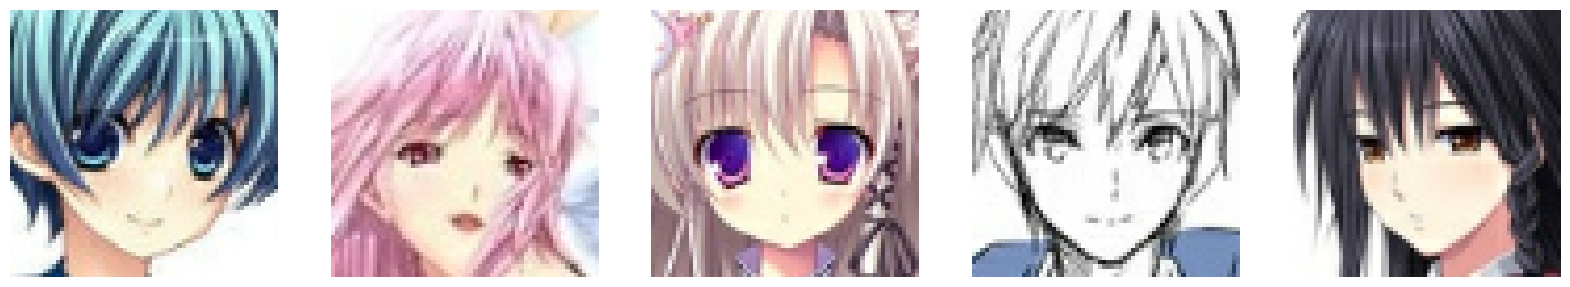

generated images


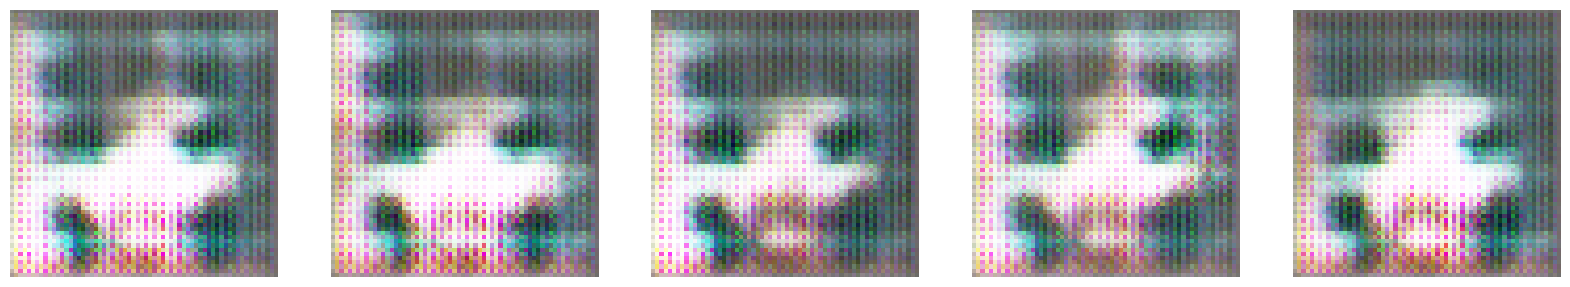

Time for epoch 1 is 1769.4743990898132 sec


In [50]:
epochs=1

discriminator=make_discriminator()

generator= make_generator()


for epoch in range(epochs):

    #data for the true distribution of your real data samples training ste
    start = time.time()
    i=0
    for X in tqdm(normalized_ds, desc=f"epoch {epoch+1}", total=len(normalized_ds)):

        i+=1
        if i%1000:
            print("epoch {}, iteration {}".format(epoch+1, i))

        train_step(X)


    noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
    Xhat=generator(noise,training=False)
    X=[x for x in normalized_ds]
    print("orignal images")
    plot_array(X[0])
    print("generated images")
    plot_array(Xhat)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

In [51]:
generator_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/data/generator.tar"
await skillsnetwork.prepare(generator_url, overwrite=True)

  0%|          | 0/7 [00:00<?, ?it/s]

Saved to '.'


In [52]:
from tensorflow.keras.models import load_model


full_generator=load_model("generator")

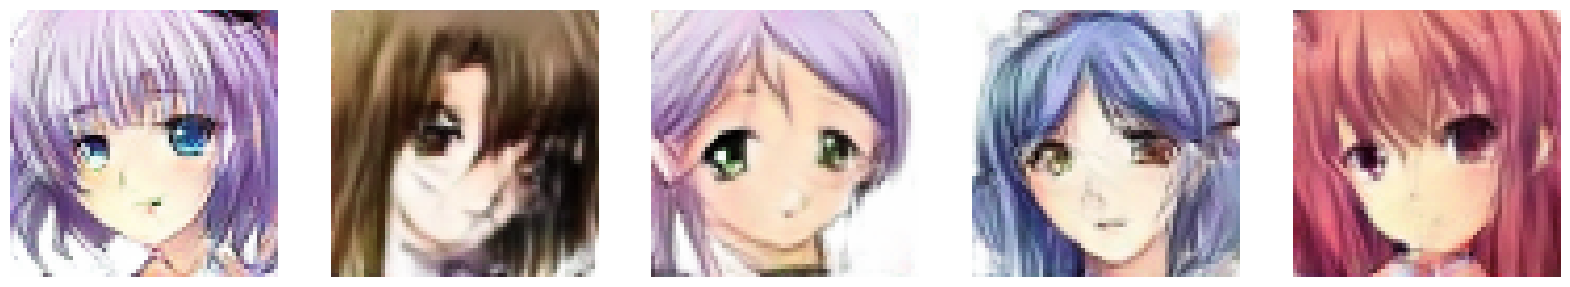

In [53]:
latent_dim=100

# input consists of noise vectors
noise = tf.random.normal([200, 1, 1, latent_dim])

# feed the noise vectors to the generator
Xhat=full_generator(noise,training=False)
plot_array(Xhat)

Exolore Latent Variable

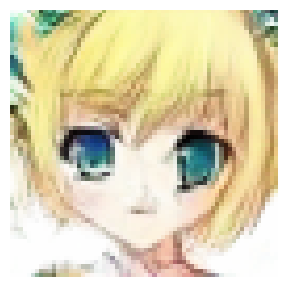

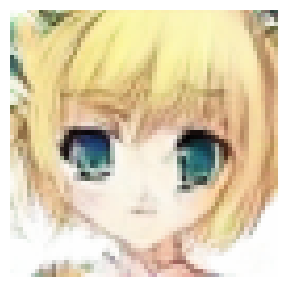

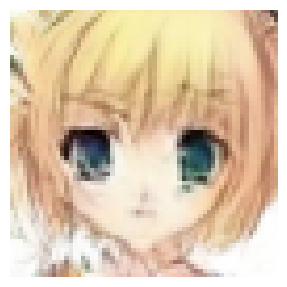

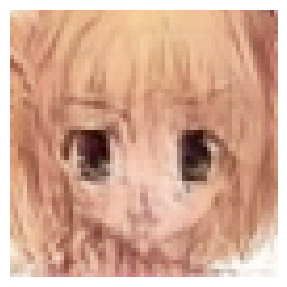

In [54]:
for c in [1,0.8,0.6,0.4]:
    Xhat=full_generator(c*tf.ones([1, 1, 1, latent_dim]),training=False) # latent_dim = 100 defined previously
    plot_array(Xhat)

Exercise 1, Plot the generated images by the Generator with elements of  z  equal  [−1,−0.8,−0.6,−0.4] .

---




In [ ]:
for c in [1,0.8,0.6,0.4]:
    Xhat=full_generator(-c*tf.ones([1, 1, 1, latent_dim]),training=False)
    plot_array(Xhat)

elements from 0 to 0 is set to -1


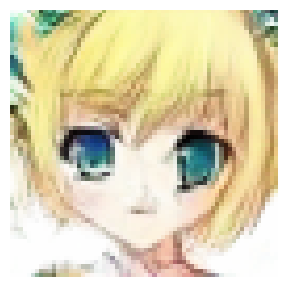

elements from 0 to 10 is set to -1


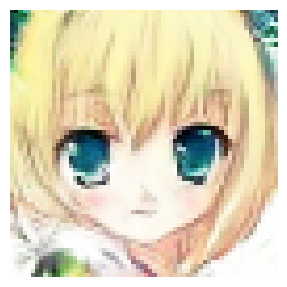

elements from 0 to 20 is set to -1


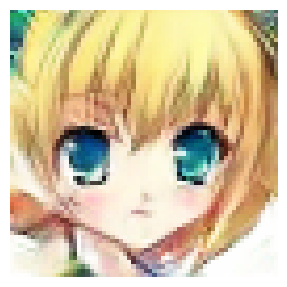

elements from 0 to 30 is set to -1


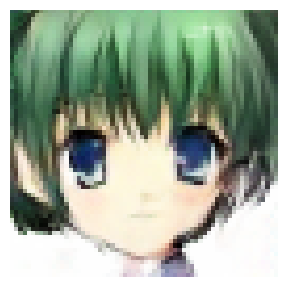

elements from 0 to 40 is set to -1


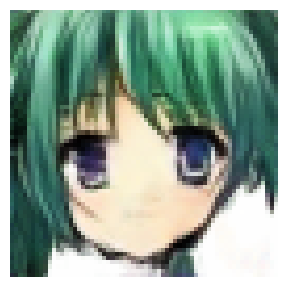

elements from 0 to 50 is set to -1


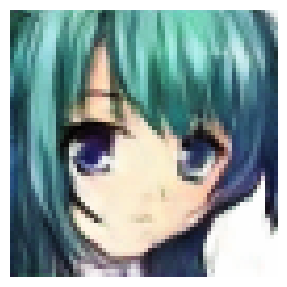

elements from 0 to 60 is set to -1


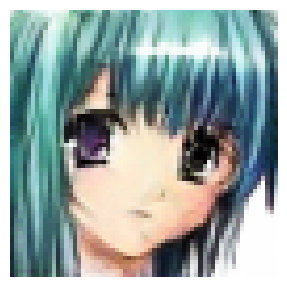

elements from 0 to 70 is set to -1


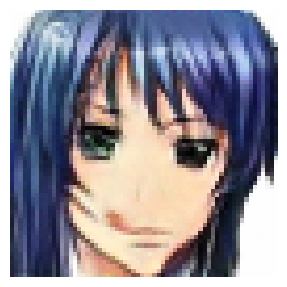

elements from 0 to 80 is set to -1


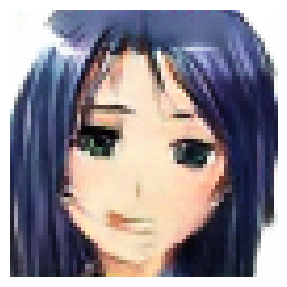

elements from 0 to 90 is set to -1


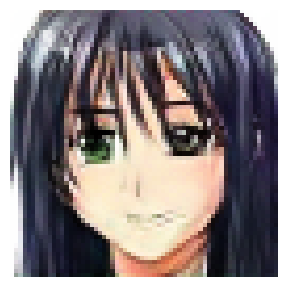

In [55]:
z=np.ones( (1, 1, 1, latent_dim))
for n in range(10):

    z[0, 0, 0, 0:10*n]=-1

    Xhat=full_generator(z,training=False)
    print("elements from 0 to {} is set to -1".format(10*n))
    plot_array(Xhat)

Exercise 2, repeat the above procedure but set the latent variable  z[0,0,0,

0:20∗n]=−0.5∗n  each time for n in range(5)

---

elements from 0 to 0 is set to -1


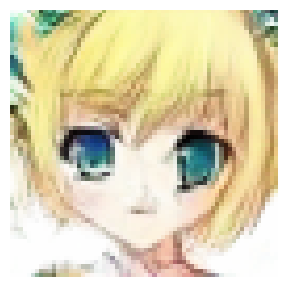

elements from 0 to 10 is set to -1


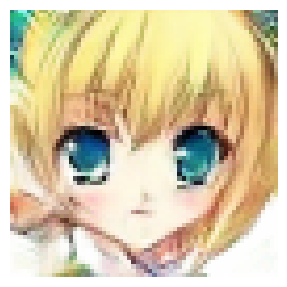

elements from 0 to 20 is set to -1


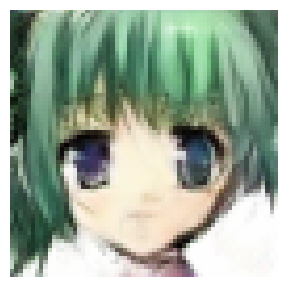

elements from 0 to 30 is set to -1


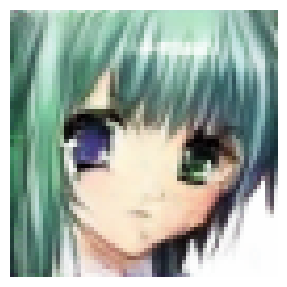

elements from 0 to 40 is set to -1


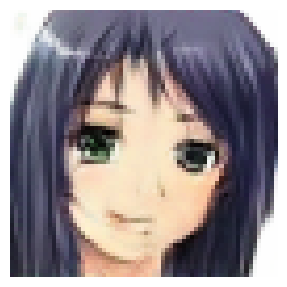

elements from 0 to 50 is set to -1


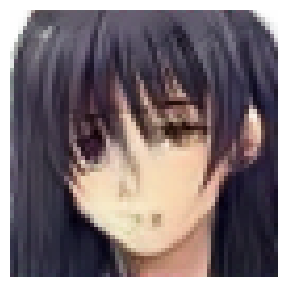

elements from 0 to 60 is set to -1


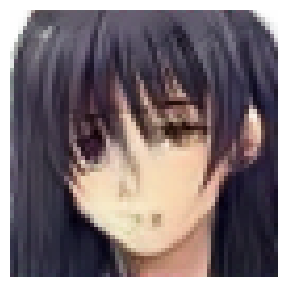

elements from 0 to 70 is set to -1


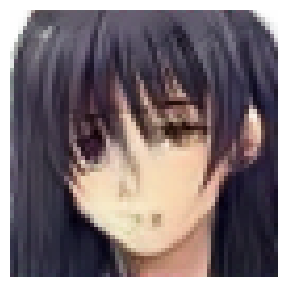

elements from 0 to 80 is set to -1


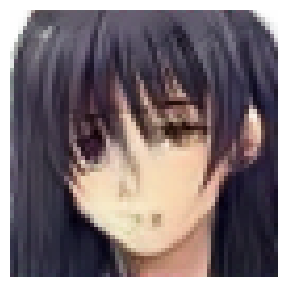

elements from 0 to 90 is set to -1


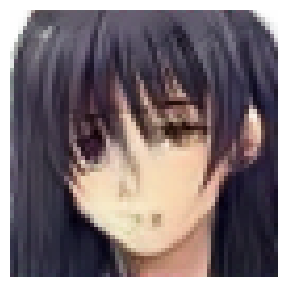

In [56]:
z=np.ones( (1, 1, 1, latent_dim))
for n in range(10):

    z[0, 0, 0, 0:20*n]=-0.5

    Xhat=full_generator(z,training=False)
    print("elements from 0 to {} is set to -1".format(10*n))
    plot_array(Xhat)

Exercise 3, Repeat the procedure above, but set the elements of  z  from index 0 to 35 to -1

elements from 0 to 0 is set to -1


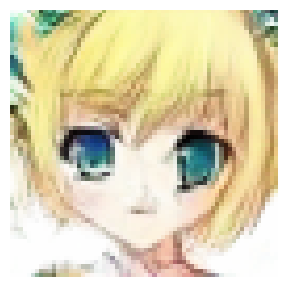

elements from 0 to 10 is set to -1


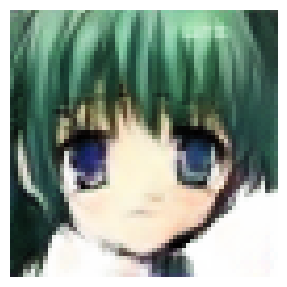

elements from 0 to 20 is set to -1


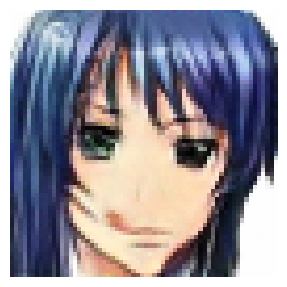

elements from 0 to 30 is set to -1


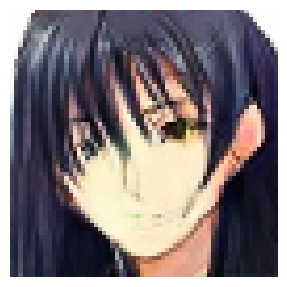

elements from 0 to 40 is set to -1


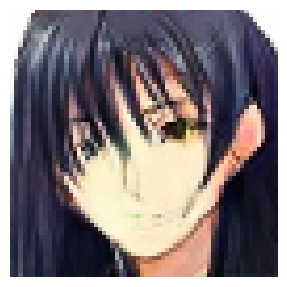

elements from 0 to 50 is set to -1


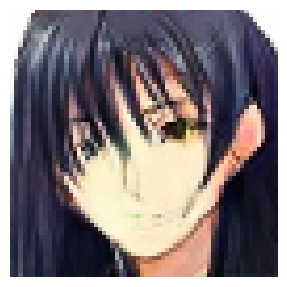

elements from 0 to 60 is set to -1


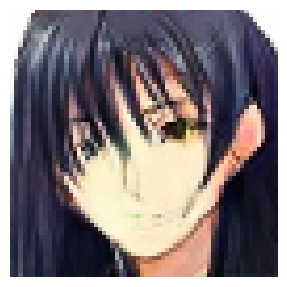

elements from 0 to 70 is set to -1


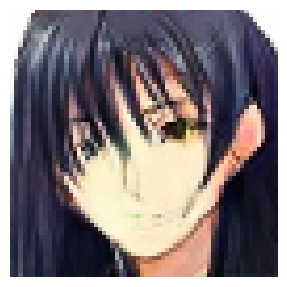

elements from 0 to 80 is set to -1


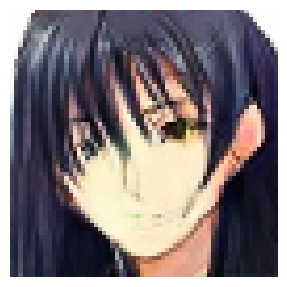

elements from 0 to 90 is set to -1


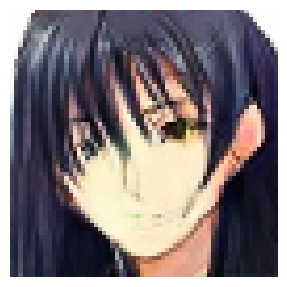

In [58]:
z=np.ones( (1, 1, 1, latent_dim))
for n in range(10):

    z[0, 0, 0, 0:35*n]=-1

    Xhat=full_generator(z,training=False)
    print("elements from 0 to {} is set to -1".format(10*n))
    plot_array(Xhat)